## Preprocess Text for NB Classifier

In [4]:
import os
import pandas as pd

# prepare the data. Read tsv files into a datafram and drop not_propaganda instances. 
def load_data_and_return_dataframe(data_dir=".", propaganda_only=False):
    train_data_path = os.path.join(data_dir, "propaganda_train.tsv")
    test_data_path = os.path.join(data_dir, "propaganda_val.tsv")
    
    train_data = pd.read_csv(train_data_path, delimiter="\t")
    test_data = pd.read_csv(test_data_path, delimiter="\t")
    
    if propaganda_only:
        train_data = train_data[train_data['label'] != 'not_propaganda'].reset_index(drop=True)
        test_data = test_data[test_data['label'] != 'not_propaganda'].reset_index(drop=True)

    return train_data, test_data

train_data, test_data = load_data_and_return_dataframe(propaganda_only=True)

In [5]:
def process_data_for_classifier(data):
    """
    Process the dataframe and return X and Y samples.
    """
    sents = []
    labels = []

    for label, text in data.values:
        bos_idx = text.find("<BOS>") # locate <BOS> token's index
        eos_idx = text.find("<EOS>") # locate <EOS> token's index

        span = text[bos_idx + len("<BOS>"):eos_idx].strip() # get the span
        context = text.replace("<BOS>", "").replace("<EOS>", "").strip() # get the context

        # concatenate the span and context (this is one way of doing this)
        sent = context + span
 
        sents.append(sent)
        labels.append(label)

    return sents, labels

X_train, Y_train = process_data_for_classifier(train_data)
X_test, Y_test = process_data_for_classifier(test_data)

## Vectorize sentences into Tfidf representation

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit on training data
vectorizer.fit(X_train)

# Transform X_train to vectors
train_vecs = vectorizer.transform(X_train)

# for test
test_vecs = vectorizer.transform(X_test)

##  Naive Bayes Model for Sequence Classification

In [7]:
from sklearn.naive_bayes import MultinomialNB

# Init MultinomialNB classifier with alpha = 0.25
NB_classifier = MultinomialNB(alpha=0.25)

# fit the data
NB_classifier.fit(train_vecs, Y_train)

# get predictions
predictions = NB_classifier.predict(test_vecs)

## Evaluate Model

Accuracy: 0.4014
Confusion Matrix:


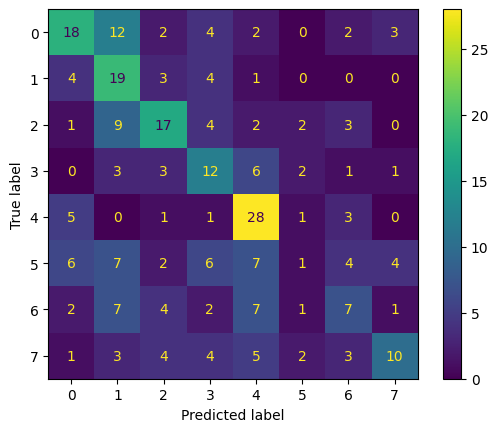

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, predictions))
disp.plot()
plt.savefig("confusion_matrix_nb.png")